### Question 10.1

In [1]:
#Setting parts
set.seed(10)
install.packages('tree')
library(randomForest)
library(caret)
library(tree)

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashka\AppData\Local\Temp\RtmpOSWTFQ\downloaded_packages


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [2]:
#Read the data 
data_raw<-read.table(file = 'C:/Users/ashka/Dropbox/GitHub/ISYE6501_Analytics_Modelling/HW7/uscrime.txt', header=TRUE)

In [3]:
#Build the model
# crime_tree_model<-tree(Crime ~. , data=uscrime)
crime_tree_model <- tree(formula = Crime ~. , data = data_raw)
summary(crime_tree_model)


Regression tree:
tree(formula = Crime ~ ., data = data_raw)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

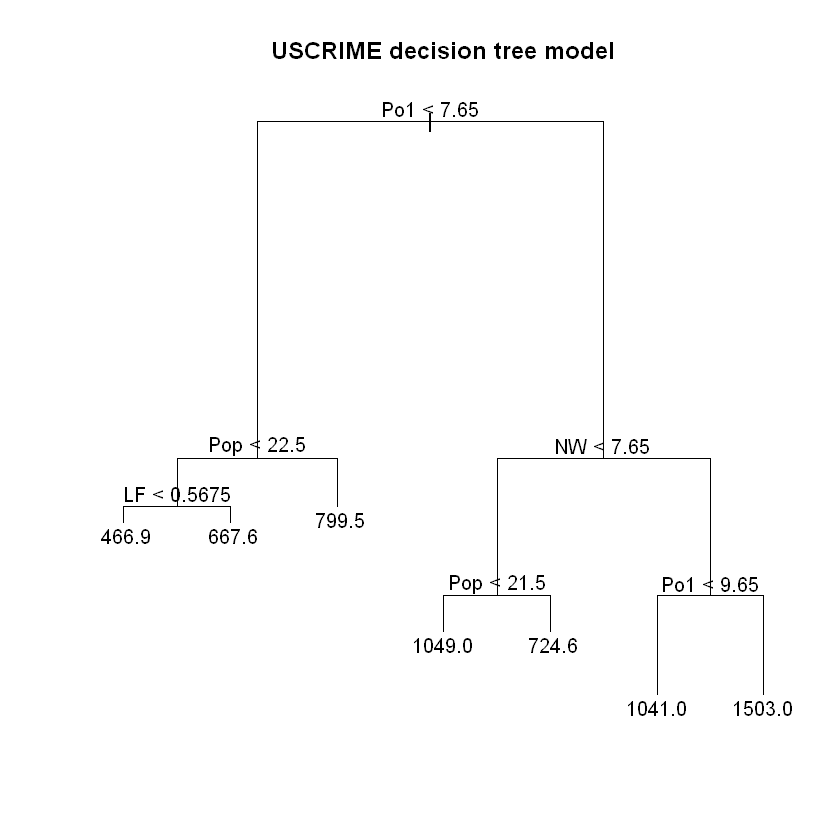

In [38]:
# Test method to check the error rate
plot(crime_tree_model)
text(crime_tree_model)
title('USCRIME decision tree model')

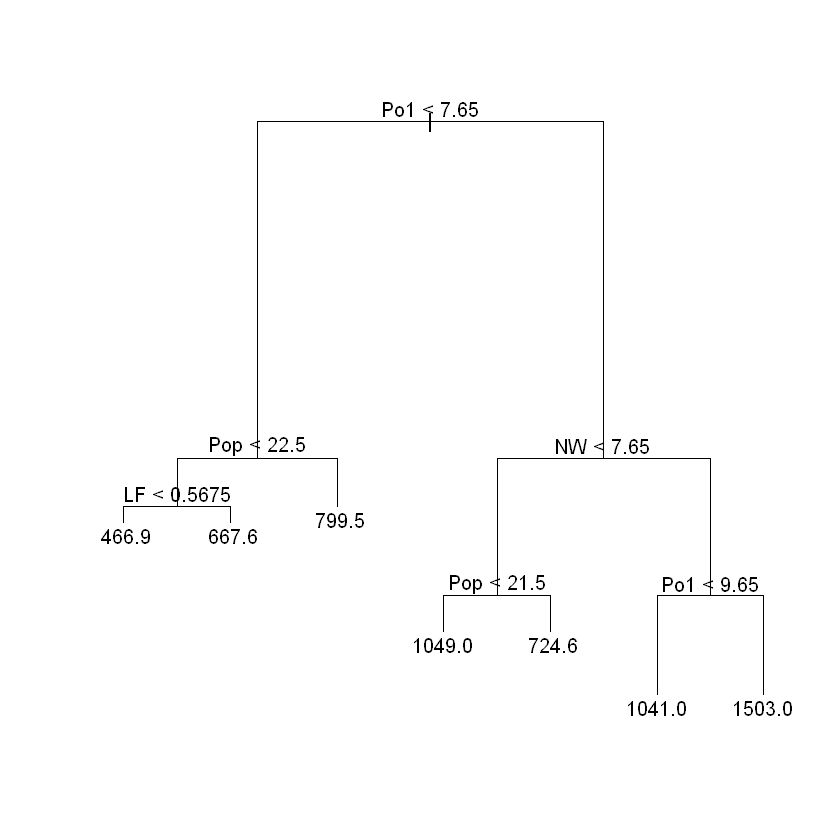

In [39]:
# prune the tree
desired_nodes<-7
tree_prune<-prune.tree(tree = crime_tree_model,best = desired_nodes)
plot(tree_prune)
text(tree_prune)

In [40]:
summary(tree_prune)


Regression tree:
tree(formula = Crime ~ ., data = data_raw)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

In [41]:
prune.tree(crime_tree_model)$dev

[1] 1895722 2013257 2276670 2632631 3364043 4383406 6880928

In [42]:
prune.tree(crime_tree_model)$size

[1] 7 6 5 4 3 2 1

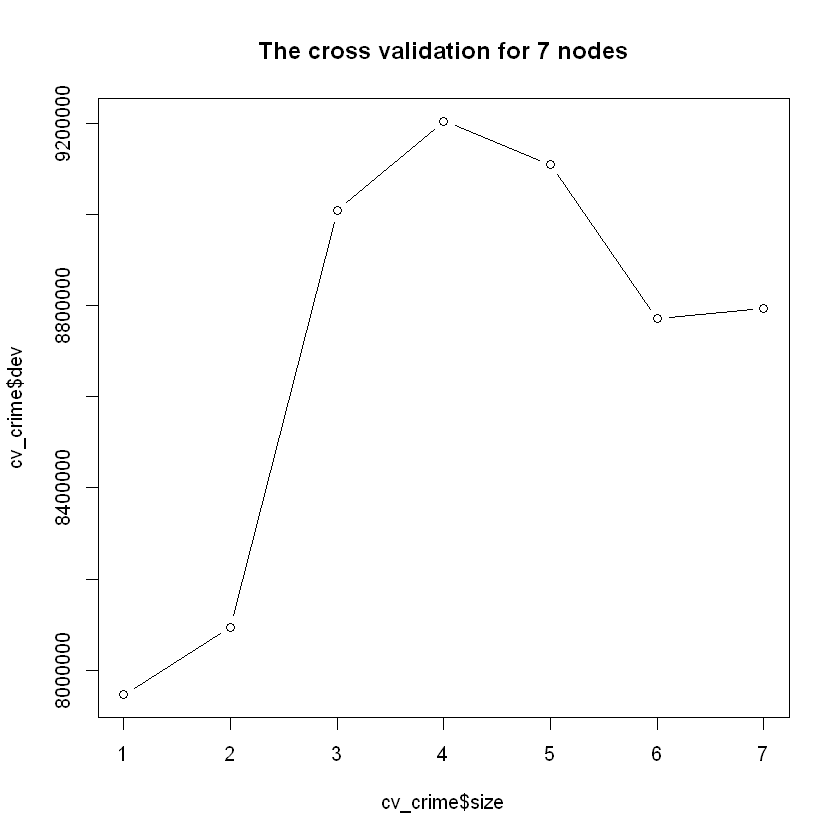

In [43]:
cv_crime<-cv.tree(crime_tree_model)
plot(cv_crime$size,cv_crime$dev,type='b')
title('The cross validation for 7 nodes')

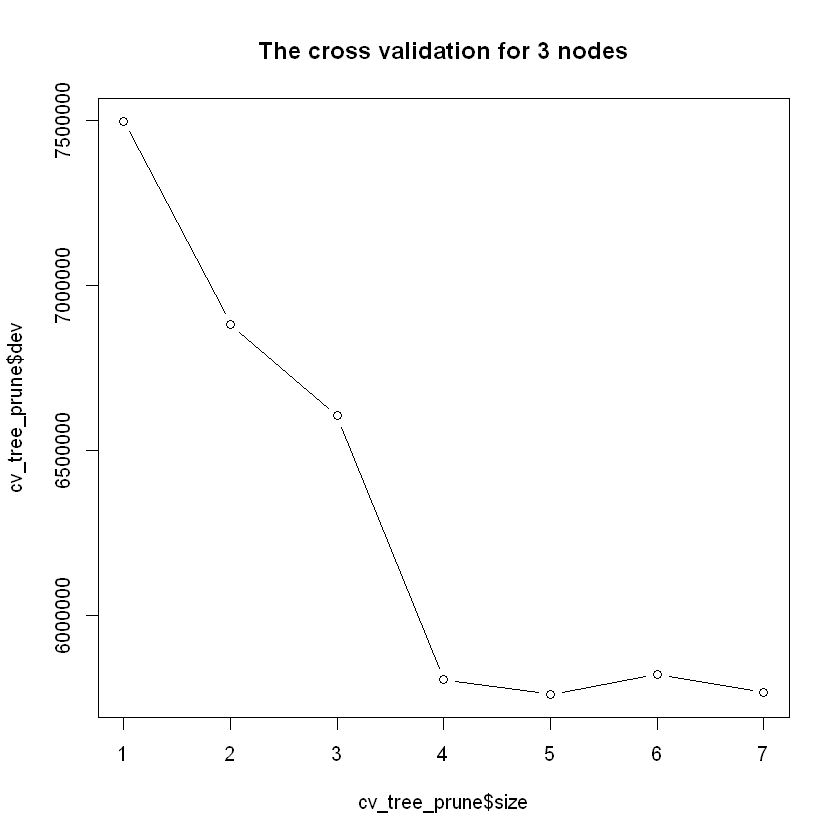

In [44]:
cv_tree_prune<-cv.tree(tree_prune)
plot(cv_tree_prune$size,cv_tree_prune$dev,type='b')
title('The cross validation for 3 nodes')

As per the above graphs it is possible to understand that the 7 node plot is providing the suitable answer comparing with the 3 nodes.

In [45]:
#calculating the quality of the fit by calculating the residual sum squared and dividing it by the true skill statistics
crime_tree_prediction<-predict(tree_prune,data=data_raw[,1:15])
RSS <- sum((crime_tree_prediction - data_raw[,16])^2)
TSS <- sum((data_raw[,16] - mean(data_raw[,16]))^2)
R2 <- 1 - RSS/TSS

As it is difficult to check all the node sizes manually, it is useful to apply a loop and check the different accuracy for the various node numbers.

In [46]:
total_results<-data.frame(matrix(nrow = 5,ncol = 2))
colnames(total_results)<-c('NodeSize','R2')
i=1
for (desired_nodes in 3:7){
    crime_tree_model <- tree(formula = Crime ~. , data = data_raw)
    tree_prune<-prune.tree(tree = crime_tree_model,best = desired_nodes)
    
    predict <- predict(tree_prune,data=data_raw[,1:15])
    RSS <- sum((predict - data_raw[,16])^2)
    TSS <- sum((data_raw[,16] - mean(data_raw[,16]))^2)
    R2 <- 1 - RSS/TSS
    total_results[i,1]<-desired_nodes
    total_results[i,2]<-R2
    i=i+1
}

It sows that increasing the nodes to 7 can greatly improve the performance.

### Part b: Random forest
Part B of the assignment will focus on the random forest and compare the results with the decision tree

In [47]:
#Use the loaded data in the tree section of the analysis

In [48]:
number_features <- 1 + log(ncol(data_raw))
random_forest_model <- randomForest(Crime~., data = data_raw, mtry = num_features, importance = T, ntree = 600)


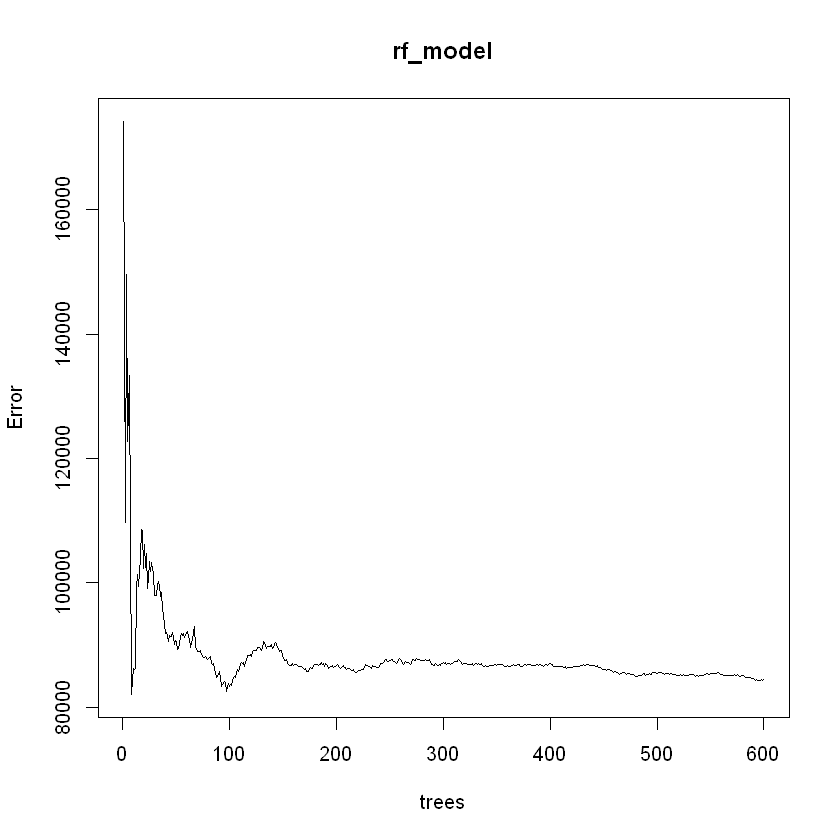

In [49]:
plot(rf_model)

In [50]:
y_predicted <- predict(random_forest_model)
y_reference<-data_raw$Crime
RSS<-sum((y_predicted-y_reference)^2)
TSS<-sum((y_reference-mean(y_reference))^2)
RSQ<-1-RSS/TSS

In [51]:
importance(random_forest_model)

,%IncMSE,IncNodePurity
M,1.9443264,237795.75
So,2.0437821,23196.77
Ed,3.6304361,244507.06
Po1,13.5325017,1170350.26
Po2,12.8656628,1053817.43
LF,1.4690139,287869.95
M.F,1.4650766,307339.41
Pop,0.7565604,368026.69
NW,10.2800395,519784.66
U1,-0.1478492,147789.51


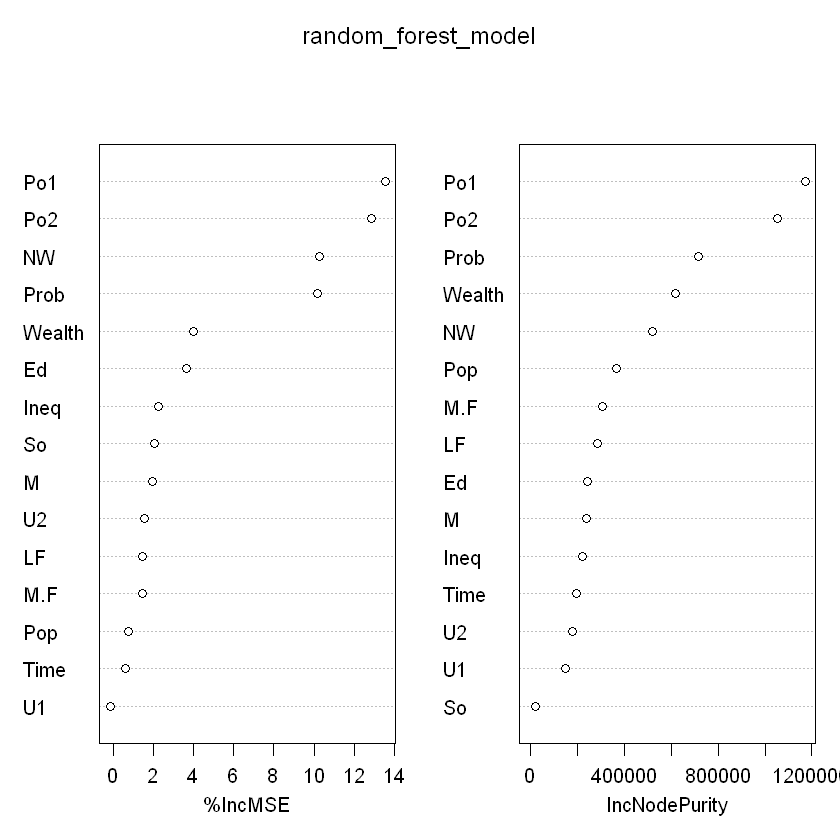

In [52]:
varImpPlot(random_forest_model)

### Q 10.2

Describe a situation or problem from your job, everyday life, current events, etc., for which a logistic regression model would be appropriate. List some (up to 5) predictors that you might use.

My job involves predicting the quality of the grain by using different data points collected using the internet of things sensors. I need to use the grain condition such as initial weight, protein level, initial moisture, crushing results and possible storage time as input to the developed algorithms and detremine the silo location for the optimum storage periods.

### Q 10.3


In [6]:
# Loading the data
raw_data<-read.table('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', header = FALSE)

In [7]:
head(raw_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [8]:
#Setting the index value to 0 and 1 
raw_data['V21'][raw_data['V21']==2]<-0

In [14]:
# we need to divide the data into train and test before moving forward with the modelling part.

data_sampling <- sample(1:nrow(raw_data), size = round(0.8*nrow(raw_data)))
train_data <- raw_data[data_sampling,]
test_data <- raw_data[-data_sampling,]

In [15]:
#Modelling part based on the logistic regression

machine_learning_model<- glm(formula=V21 ~.,family = binomial(link='logit'),data = train_data)
summary(machine_learning_model)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5756  -0.6508   0.3761   0.6724   1.9524  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.091e+00  1.228e+00  -0.889 0.374213    
V1A12        3.372e-01  2.557e-01   1.319 0.187234    
V1A13        7.710e-01  4.078e-01   1.891 0.058666 .  
V1A14        1.505e+00  2.616e-01   5.753 8.78e-09 ***
V2          -2.933e-02  1.046e-02  -2.805 0.005036 ** 
V3A31        5.133e-02  6.155e-01   0.083 0.933537    
V3A32        8.863e-01  4.745e-01   1.868 0.061767 .  
V3A33        1.110e+00  5.145e-01   2.157 0.031041 *  
V3A34        1.842e+00  5.030e-01   3.661 0.000251 ***
V4A41        1.795e+00  4.506e-01   3.985 6.76e-05 ***
V4A410       2.204e+00  9.724e-01   2.266 0.023435 *  
V4A42        6.008e-01  3.003e-01   2.001 0.045402 *  
V4A43        8.248e-01  2.840e-01   2.904 0.003679 ** 
V4A44        2.30

In [19]:
#This part will focus on the model prediction  

logistic_model_prediction<-predict(object = machine_learning_model,data = test_data,type = 'response')
# yhat1 <- as.integer(yhat_logit > 0.5)
logistic_model_prediction_results<-as.integer(logistic_model_prediction > 0.5)

In [44]:
# The confusion matrix is not created as for some reason the result of the prediction is not match with the size 
# of the data which we have entered.??
table(test_data$V21,test_data$V21)
table(test_data$V21,logistic_model_prediction_results)

   
      0   1
  0  69   0
  1   0 131

ERROR: Error in table(test_data$V21, logistic_model_prediction_results): all arguments must have the same length


In [46]:
# The functionality test can be applied as follows. ?? the size of the test_data and the prediction is not matched for some reason

AUC<-roc(test_data$V21,logistic_model_prediction_results)

ERROR: Error in roc(test_data$V21, logistic_model_prediction_results): could not find function "roc"
